In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
trainFile = 'train.csv'
testFile = 'test.csv'
trainDf = pd.read_csv(trainFile, index_col='Id')
testDf = pd.read_csv(testFile, index_col='Id')

In [3]:
trainDf.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
testDf.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
trainDf.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

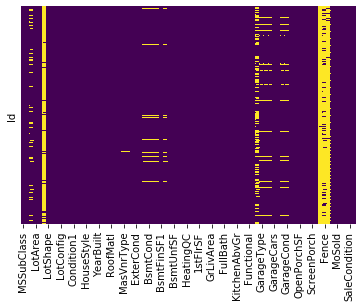

In [7]:
sns.heatmap(trainDf.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#Too many NAs LotShape, Fence, GarageType

In [8]:
# Clean up NAs
# How many NAs?
NAs = pd.concat([trainDf.isnull().sum()], axis=1)
NAs[NAs.sum(axis=1) > 0]

,0
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [9]:
missingCols = list(NAs[NAs.sum(axis=1) > 0].index)
missingCols 

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [10]:
trainDf = trainDf.drop(missingCols, axis=1)
testDf = testDf.drop(missingCols, axis=1)

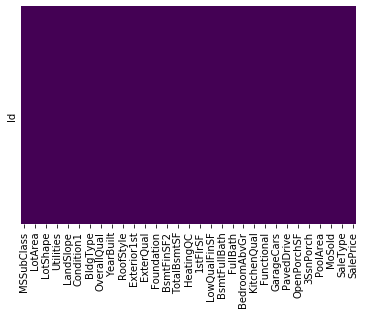

In [11]:
sns.heatmap(trainDf.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
trainDf.columns.difference(testDf.columns)

Index(['SalePrice'], dtype='object')

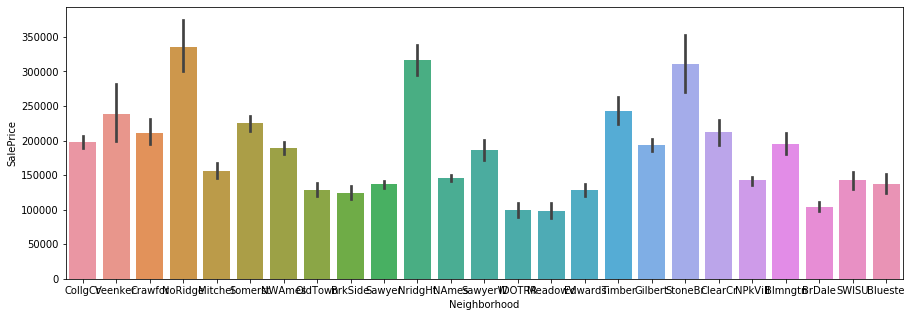

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(x='Neighborhood', y='SalePrice', data = trainDf)

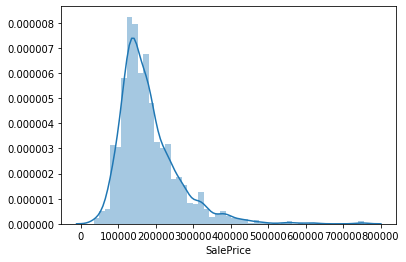

In [14]:
sns.distplot(trainDf['SalePrice'])

In [15]:
# Create Dummies for Train Data
trainNums = trainDf.drop('SalePrice', axis=1).select_dtypes('int64', 'float64')
trainCats = trainDf.drop('SalePrice', axis=1).select_dtypes(exclude=['int64', 'float64'])
cat_feats = list(trainCats.columns.values.tolist())
dummyDf = pd.get_dummies(trainCats, columns = cat_feats, drop_first = True)
# Join dummyDf to trainDf
finalTrainDf = pd.concat([trainNums, dummyDf], axis=1, sort=False)
finalTrainDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Columns: 188 entries, MSSubClass to SaleCondition_Partial
dtypes: int64(33), uint8(155)
memory usage: 648.8 KB


In [16]:
# Create Dummies for Test Data
testNums = testDf.select_dtypes('int64', 'float64')
testCats = testDf.select_dtypes(exclude=['int64', 'float64'])
cat_feats = list(trainCats.columns.values.tolist())
dummyDf = pd.get_dummies(testCats, columns = cat_feats, drop_first = True)
# Join dummyDf to trainDf
finalTestDf = pd.concat([testNums, dummyDf], axis=1, sort=False)
finalTestDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Columns: 166 entries, MSSubClass to SaleCondition_Partial
dtypes: int64(25), uint8(141)
memory usage: 497.3 KB


In [17]:
finalTestDf.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,11622,5,6,1961,1961,896,0,0,896,...,0,0,0,0,1,0,0,0,1,0
1462,20,14267,6,6,1958,1958,1329,0,0,1329,...,0,0,0,0,1,0,0,0,1,0
1463,60,13830,5,5,1997,1998,928,701,0,1629,...,0,0,0,0,1,0,0,0,1,0
1464,60,9978,6,6,1998,1998,926,678,0,1604,...,0,0,0,0,1,0,0,0,1,0
1465,120,5005,8,5,1992,1992,1280,0,0,1280,...,0,0,0,0,1,0,0,0,1,0


In [18]:
finalTrainDf.columns.difference(finalTestDf.columns)

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
       'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other',
       'GarageArea', 'GarageCars', 'Heating_GasA', 'Heating_OthW',
       'HouseStyle_2.5Fin', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'TotalBsmtSF', 'Utilities_NoSeWa'],
      dtype='object')

In [19]:
missingCols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
       'Electrical_Mix', 'Exterior1st_ImStucc', 'Exterior1st_Stone',
       'Exterior2nd_Other', 'GarageArea', 'GarageCars', 'GarageQual_Fa',
       'Heating_GasA', 'Heating_OthW', 'HouseStyle_2.5Fin', 'MiscFeature_TenC',
       'PoolQC_Fa', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'TotalBsmtSF', 'Utilities_NoSeWa']
finalTestDf[missingCols] = pd.DataFrame([[0] * len(missingCols)], index=finalTestDf.index)

In [20]:
finalTrainDf.columns.difference(finalTestDf.columns)

Index([], dtype='object')

In [21]:
# Scale Data
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(finalTrainDf)
scaled_features = scaler.transform(finalTrainDf)
scaledTrainDf = pd.DataFrame(scaled_features, columns = finalTrainDf.columns)

In [22]:
# Scale Test Data
scaler.fit(finalTestDf)
scaledTestfeatures = scaler.transform(finalTestDf)
scaledTestDf = pd.DataFrame(scaledTestfeatures, columns = finalTestDf.columns)

In [23]:
scaledTestDf.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,Heating_OthW,HouseStyle_2.5Fin,MiscFeature_TenC,PoolQC_Fa,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,TotalBsmtSF,Utilities_NoSeWa
0,-0.6,0.538713,-0.5,1.0,-0.250000,-0.756098,-0.359528,0.000000,0.0,-0.888152,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.6,1.179692,0.0,1.0,-0.312500,-0.829268,0.491159,0.000000,0.0,-0.170671,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.2,1.073791,-0.5,0.0,0.500000,0.146341,-0.296660,1.036982,0.0,0.326429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.2,0.140313,0.0,1.0,0.520833,0.146341,-0.300589,1.002959,0.0,0.285004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.4,-1.064825,1.0,0.0,0.395833,0.000000,0.394892,0.000000,0.0,-0.251864,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaledTrainDf, trainDf['SalePrice'], test_size=0.3)

In [25]:
from sklearn import metrics

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
def get_rmse(estimator, X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(n_estimators=estimator)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    rmse = np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(prediction)))
    return rmse

In [28]:
estimatorList = [1, 5, 25, 50, 100, 250, 500, 750, 1000]
rmseList = []
for estimator in estimatorList:
    my_rmse = get_rmse(estimator, X_train, X_test, y_train, y_test)
    rmseList.append(my_rmse)

In [29]:
rmseList

[0.21592925601587662,
 0.15185477481236148,
 0.14125557076572395,
 0.1394657304901999,
 0.135843810379439,
 0.13426699737122103,
 0.13418881406249836,
 0.1334606735202182,
 0.1335911788708579]

In [30]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [31]:
np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(predictions)))

0.13592711038824476

In [32]:
# Submission

In [33]:
testDf.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,0,120,0,0,6,2010,WD,Normal
1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,36,0,0,0,0,12500,6,2010,WD,Normal
1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,34,0,0,0,0,0,3,2010,WD,Normal
1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,36,0,0,0,0,0,6,2010,WD,Normal
1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,...,82,0,0,144,0,0,1,2010,WD,Normal


In [34]:
scaledTestDf

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,Heating_OthW,HouseStyle_2.5Fin,MiscFeature_TenC,PoolQC_Fa,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,TotalBsmtSF,Utilities_NoSeWa
0,-0.6,0.538713,-0.5,1.0,-0.250000,-0.756098,-0.359528,0.000000,0.0,-0.888152,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.6,1.179692,0.0,1.0,-0.312500,-0.829268,0.491159,0.000000,0.0,-0.170671,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.2,1.073791,-0.5,0.0,0.500000,0.146341,-0.296660,1.036982,0.0,0.326429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.2,0.140313,0.0,1.0,0.520833,0.146341,-0.300589,1.002959,0.0,0.285004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.4,-1.064825,1.0,0.0,0.395833,0.000000,0.394892,0.000000,0.0,-0.251864,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.2,-1.808554,-1.0,2.0,-0.062500,-0.536585,-1.047151,0.807692,0.0,-0.563380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1455,2.2,-1.818733,-1.0,0.0,-0.062500,-0.536585,-1.047151,0.807692,0.0,-0.563380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,-0.6,2.569005,-0.5,2.0,-0.270833,0.097561,0.284872,0.000000,0.0,-0.344656,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,0.7,0.252514,-0.5,0.0,0.395833,0.000000,-0.214145,0.000000,0.0,-0.765534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
scaledTestDf.columns.difference(scaledTrainDf.columns)

Index(['Electrical_Mix', 'GarageQual_Fa', 'MiscFeature_TenC', 'PoolQC_Fa'], dtype='object')

In [36]:
scaledTestDf = scaledTestDf.drop(['Electrical_Mix', 'GarageQual_Fa', 'MiscFeature_TenC', 'PoolQC_Fa'], axis=1)

In [37]:
pred = model.predict(scaledTestDf)
presubmissionDf = pd.DataFrame(pred, columns=['SalePrice'])
presubmissionDf = pd.concat([scaledTestDf,presubmissionDf], axis=1)
presubmissionDf.index = np.arange(1461, 1461+len(presubmissionDf))
presubmissionDf

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,Heating_GasA,Heating_OthW,HouseStyle_2.5Fin,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,TotalBsmtSF,Utilities_NoSeWa,SalePrice
1461,-0.6,0.538713,-0.5,1.0,-0.250000,-0.756098,-0.359528,0.000000,0.0,-0.888152,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,148872.99
1462,-0.6,1.179692,0.0,1.0,-0.312500,-0.829268,0.491159,0.000000,0.0,-0.170671,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170423.19
1463,0.2,1.073791,-0.5,0.0,0.500000,0.146341,-0.296660,1.036982,0.0,0.326429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,165223.36
1464,0.2,0.140313,0.0,1.0,0.520833,0.146341,-0.300589,1.002959,0.0,0.285004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,175956.34
1465,1.4,-1.064825,1.0,0.0,0.395833,0.000000,0.394892,0.000000,0.0,-0.251864,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,216005.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,2.2,-1.808554,-1.0,2.0,-0.062500,-0.536585,-1.047151,0.807692,0.0,-0.563380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140529.18
2916,2.2,-1.818733,-1.0,0.0,-0.062500,-0.536585,-1.047151,0.807692,0.0,-0.563380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,137127.71
2917,-0.6,2.569005,-0.5,2.0,-0.270833,0.097561,0.284872,0.000000,0.0,-0.344656,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,169431.05
2918,0.7,0.252514,-0.5,0.0,0.395833,0.000000,-0.214145,0.000000,0.0,-0.765534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150390.90


In [38]:
submissionDf=pd.DataFrame(presubmissionDf['SalePrice'], columns=['SalePrice'])
submissionDf = submissionDf.rename_axis('Id')
submissionDf

,SalePrice
Id,
1461,148872.99
1462,170423.19
1463,165223.36
1464,175956.34
1465,216005.98
...,...
2915,140529.18
2916,137127.71
2917,169431.05


In [39]:
submissionDf.to_csv('housingPricePredictions.csv')